**Borrelia 2018-2019 Clinical Data**

2018-2019_all.csv : both years, all febrile patients including the malaria positive patients. Lab data is not included 

**1. Importing and Reading Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

2018-19_Final_No_Malaria.ipynb     2018-19_no_malaria.csv
2018-19_all.csv                    2018-2019Final_with_Malaria.ipynb


In [3]:
df = pd.read_csv("2018-19_all.csv")

In [4]:
df

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,SHC0001,46.0,F,Thies,38.4,fever,NaN,120.0,high,2.0,...,2.0,2.0,2.0,0.0,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,SHC0002,10.0,F,Thies,38.1,fever,2.0,32.0,low,2.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,no_travel,seche,0.0
2,SHC0003,12.0,M,Thies,38.9,fever,NaN,36.0,low,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
3,SHC0004,10.0,M,Thies,36.0,no_fever,3.0,100.0,normal,2.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,SHC0005,11.0,F,Thies,38.6,fever,NaN,104.0,normal,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,2.0,NaN,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
520,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,2.0,NaN,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        523 non-null    object 
 1   Age                               523 non-null    float64
 2   Sexe                              523 non-null    object 
 3   Lieu actuel de ésidence_category  507 non-null    object 
 4   Temperature                       523 non-null    float64
 5   Temperature_category              523 non-null    object 
 6   NbreJrsFievre                     342 non-null    float64
 7   Rythme cardiaque                  500 non-null    float64
 8   Rythme cardiaque_category         500 non-null    object 
 9   Antibiotiques pris                520 non-null    float64
 10  Antipaludiques pris               489 non-null    float64
 11  Diagnostic paludisme recu         521 non-null    float64
 12  enceinte

In [6]:
#calling out continuous variables from data
def get_continuous_variables(df):
    continuous_vars = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continuous_vars.append(col)
    return continuous_vars

In [7]:
continuous_variables = get_continuous_variables(df)
print("Continuous variables:", continuous_variables)

Continuous variables: ['Age', 'Temperature', 'NbreJrsFievre', 'Rythme cardiaque', 'Antibiotiques pris', 'Antipaludiques pris', 'Diagnostic paludisme recu', 'enceinte', 'sympt_mal_tete', 'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse', 'sympt_mal_dos', 'sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee', 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'sympt_convulsions', 'sympt_perte_conaissance', 'sympt_Prostration', 'sympt_abdo_pain', 'sympt_dental', 'sympt_anorex', 'sympt_dysphagia', 'sympt_wound', 'sympt_eye_problem', 'glycemie', 'hemoglobine', 'TDR_Resultat', 'goutte_epaisse_Resultat', 'frottis_mince_Resultat', 'DensitePfalciparum_modified', 'contact_pers_febrile', 'contact_presence_rats', 'voyage_fait', 'Borrelia']


In [8]:
num_vars = len(df.columns)
print("Number of variables (using len):", num_vars)

Number of variables (using len): 46


In [9]:
# Count variables with null values
null_counts = df.isnull().sum()
pd.set_option('display.max_rows', len(df.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Unnamed: 0                            0
Age                                   0
Sexe                                  0
Lieu actuel de ésidence_category     16
Temperature                           0
Temperature_category                  0
NbreJrsFievre                       181
Rythme cardiaque                     23
Rythme cardiaque_category            23
Antibiotiques pris                    3
Antipaludiques pris                  34
Diagnostic paludisme recu             2
enceinte                            120
sympt_mal_tete                        1
sympt_courbatures                     1
sympt_vertiges                        1
sympt_vomissements                    1
sympt_fatigue_faiblesse               2
sympt_mal_dos                         1
sympt_douleur_thoracique              1
sympt_difficulte_respirer             1
sympt_eruption_cutanee                1
sympt_toux_maldegorge                 1
sympt_inflammation                    1
sympt_saignement                      1


In [13]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# import pandas_profiling as pp
# pp.ProfileReport(df)

In [14]:
df

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,SHC0001,46.0,F,Thies,38.4,fever,NaN,120.0,high,2.0,...,2.0,2.0,2.0,0.0,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,SHC0002,10.0,F,Thies,38.1,fever,2.0,32.0,low,2.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,no_travel,seche,0.0
2,SHC0003,12.0,M,Thies,38.9,fever,NaN,36.0,low,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
3,SHC0004,10.0,M,Thies,36.0,no_fever,3.0,100.0,normal,2.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,SHC0005,11.0,F,Thies,38.6,fever,NaN,104.0,normal,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,2.0,NaN,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
520,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,2.0,NaN,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [15]:
import numpy as np

In [16]:
bpos = len(df[df['Borrelia'] == 1])
bneg = len(df[df['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df.columns))
print(df.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 38
number of Boleria neg is: 485
                             count    min       max
Age                          523.0   2.00      72.0
Temperature                  523.0  36.00      41.5
NbreJrsFievre                342.0   1.00      32.0
Rythme cardiaque             500.0  32.00     389.0
Antibiotiques pris           520.0   1.00       2.0
Antipaludiques pris          489.0   1.00       2.0
Diagnostic paludisme recu    521.0   1.00       2.0
enceinte                     403.0   1.00       2.0
sympt_mal_tete               522.0   1.00       2.0
sympt_courbatures            522.0   1.00       2.0
sympt_vertiges               522.0   1.00       2.0
sympt_vomissements           522.0   1.00       2.0
sympt_fatigue_faiblesse      521.0   1.00       2.0
sympt_mal_dos                522.0   1.00       2.0
sympt_douleur_thoracique     522.0   1.00       2.0
sympt_difficulte_respirer    522.0   1.00       2.0
sympt_eruption_cutanee       522.0   1.00       2.0
sympt

In [17]:
for i in df.columns:
    print(i,len(df[i].unique()))

Unnamed: 0 523
Age 61
Sexe 3
Lieu actuel de ésidence_category 4
Temperature 49
Temperature_category 3
NbreJrsFievre 8
Rythme cardiaque 96
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
enceinte 3
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_convulsions 3
sympt_perte_conaissance 3
sympt_Prostration 3
sympt_abdo_pain 2
sympt_dental 2
sympt_anorex 2
sympt_dysphagia 2
sympt_wound 2
sympt_eye_problem 2
glycemie 106
hemoglobine 123
TDR_Resultat 3
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
DensitePfalciparum_modified 38
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
Borrelia 2


In [18]:
df1 = df.copy()
df1

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,SHC0001,46.0,F,Thies,38.4,fever,NaN,120.0,high,2.0,...,2.0,2.0,2.0,0.0,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,SHC0002,10.0,F,Thies,38.1,fever,2.0,32.0,low,2.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,no_travel,seche,0.0
2,SHC0003,12.0,M,Thies,38.9,fever,NaN,36.0,low,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
3,SHC0004,10.0,M,Thies,36.0,no_fever,3.0,100.0,normal,2.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,SHC0005,11.0,F,Thies,38.6,fever,NaN,104.0,normal,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,2.0,NaN,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
520,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,2.0,NaN,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [19]:
# Delete columns year and lab data
#df1 = df1.drop(['Unnamed: 0', 'NbreJrsFievre', 'Rythme cardiaque', 'enceinte'], axis=1)

# Delete column temperature, 
df1 = df1.drop(['Unnamed: 0', 'NbreJrsFievre', 'Rythme cardiaque', 'enceinte', 'Lieu actuel de ésidence_category', 'Temperature', 'sympt_convulsions',
               'sympt_perte_conaissance', 'sympt_Prostration', 'sympt_dental', 'sympt_anorex', 'sympt_dysphagia'], axis=1)


# Print the updated DataFrame
print("Updated DataFrame:")
print(df1)

Updated DataFrame:
      Age Sexe Temperature_category Rythme cardiaque_category  \
0    46.0    F                fever                      high   
1    10.0    F                fever                       low   
2    12.0    M                fever                       low   
3    10.0    M             no_fever                    normal   
4    11.0    F                fever                    normal   
..    ...  ...                  ...                       ...   
518  26.0    F                fever                      high   
519  12.0    M                fever                       low   
520  54.0    M             no_fever                    normal   
521  11.0    F         severe_fever                    normal   
522  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        1.0   
1                   2.0                  2.0      

In [20]:
df1

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,46.0,F,fever,high,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,10.0,F,fever,low,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,no_travel,seche,0.0
2,12.0,M,fever,low,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
3,10.0,M,no_fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,11.0,F,fever,normal,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
520,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [21]:
print(df1['Sexe'].unique())

['F' 'M' 'H']


In [22]:

# The value you want to replace
old_value = 'H'

# The value you want to replace with
new_value = 'M'

# Replace the old_value with the new_value in the specified column
df1['Sexe'] = df1['Sexe'].replace(old_value, new_value)

print(df1)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    46.0    F                fever                      high   
1    10.0    F                fever                       low   
2    12.0    M                fever                       low   
3    10.0    M             no_fever                    normal   
4    11.0    F                fever                    normal   
..    ...  ...                  ...                       ...   
518  26.0    F                fever                      high   
519  12.0    M                fever                       low   
520  54.0    M             no_fever                    normal   
521  11.0    F         severe_fever                    normal   
522  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        1.0   
1                   2.0                  2.0                        1

*df1 is df that has null values i.e. may need imputation to fill null values*

In [23]:
df2 = df1.copy()
df2

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,46.0,F,fever,high,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,10.0,F,fever,low,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,no_travel,seche,0.0
2,12.0,M,fever,low,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
3,10.0,M,no_fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,11.0,F,fever,normal,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
520,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [24]:
for i in df2.columns:
    print(i,len(df2[i].unique()))

Age 61
Sexe 2
Temperature_category 3
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_abdo_pain 2
sympt_wound 2
sympt_eye_problem 2
glycemie 106
hemoglobine 123
TDR_Resultat 3
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
DensitePfalciparum_modified 38
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
Borrelia 2


In [25]:
print(df2['Sexe'].unique())

['F' 'M']


In [26]:

# The value you want to replace
old_value = 'H'

# The value you want to replace with
new_value = 'M'

# Replace the old_value with the new_value in the specified column
df2['Sexe'] = df2['Sexe'].replace(old_value, new_value)

print(df2)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    46.0    F                fever                      high   
1    10.0    F                fever                       low   
2    12.0    M                fever                       low   
3    10.0    M             no_fever                    normal   
4    11.0    F                fever                    normal   
..    ...  ...                  ...                       ...   
518  26.0    F                fever                      high   
519  12.0    M                fever                       low   
520  54.0    M             no_fever                    normal   
521  11.0    F         severe_fever                    normal   
522  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        1.0   
1                   2.0                  2.0                        1

In [27]:
# Remove rows with null values in df2
df2 = df2.dropna()

# Print the DataFrame after removing null values
print("DataFrame after removing null values:")
print(df2)

DataFrame after removing null values:
      Age Sexe Temperature_category Rythme cardiaque_category  \
0    46.0    F                fever                      high   
1    10.0    F                fever                       low   
2    12.0    M                fever                       low   
3    10.0    M             no_fever                    normal   
4    11.0    F                fever                    normal   
..    ...  ...                  ...                       ...   
508  15.0    F                fever                      high   
509  36.0    F             no_fever                    normal   
513   5.0    F                fever                    normal   
514   7.0    M         severe_fever                    normal   
515   4.0    M         severe_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        1.0   
1                   2.0        

In [28]:
# Select features with strings
names_columns = df2.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'Sexe', 'Temperature_category', 'Rythme cardiaque_category',
       'Antibiotiques pris', 'Antipaludiques pris',
       'Diagnostic paludisme recu', 'sympt_mal_tete', 'sympt_courbatures',
       'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse',
       'sympt_mal_dos', 'sympt_douleur_thoracique',
       'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
       'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement',
       'sympt_abdo_pain', 'sympt_wound', 'sympt_eye_problem', 'glycemie',
       'hemoglobine', 'TDR_Resultat', 'goutte_epaisse_Resultat',
       'frottis_mince_Resultat', 'DensitePfalciparum_modified',
       'contact_pers_febrile', 'contact_presence_rats', 'voyage_fait',
       'voyage_details_category', 'saison', 'Borrelia'],
      dtype='object')


In [29]:
for i in df2.columns:
    print(i,len(df2[i].unique()))

Age 59
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_wound 2
sympt_eye_problem 2
glycemie 99
hemoglobine 109
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
DensitePfalciparum_modified 31
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2


In [30]:
# Count variables with null values
null_counts = df2.isnull().sum()
pd.set_option('display.max_rows', len(df2.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                            0
Sexe                           0
Temperature_category           0
Rythme cardiaque_category      0
Antibiotiques pris             0
Antipaludiques pris            0
Diagnostic paludisme recu      0
sympt_mal_tete                 0
sympt_courbatures              0
sympt_vertiges                 0
sympt_vomissements             0
sympt_fatigue_faiblesse        0
sympt_mal_dos                  0
sympt_douleur_thoracique       0
sympt_difficulte_respirer      0
sympt_eruption_cutanee         0
sympt_toux_maldegorge          0
sympt_inflammation             0
sympt_saignement               0
sympt_abdo_pain                0
sympt_wound                    0
sympt_eye_problem              0
glycemie                       0
hemoglobine                    0
TDR_Resultat                   0
goutte_epaisse_Resultat        0
frottis_mince_Resultat         0
DensitePfalciparum_modified    0
contact_pers_febrile           0
contact_presence_rats          0
voyage_fai

*df2 is df that has null values removed i.e. no imputation done*

In [31]:
df3 = df2.copy()
df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,46.0,F,fever,high,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,10.0,F,fever,low,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,no_travel,seche,0.0
2,12.0,M,fever,low,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
3,10.0,M,no_fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,11.0,F,fever,normal,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,15.0,F,fever,high,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,pluie,0.0
509,36.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.0,2.0,1.0,2.0,no_travel,pluie,0.0
513,5.0,F,fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,0.0,2.0,1.0,2.0,no_travel,pluie,0.0
514,7.0,M,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,0.0,2.0,1.0,2.0,no_travel,pluie,1.0


In [32]:
# Count variables with null values
null_counts = df3.isnull().sum()
pd.set_option('display.max_rows', len(df3.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                            0
Sexe                           0
Temperature_category           0
Rythme cardiaque_category      0
Antibiotiques pris             0
Antipaludiques pris            0
Diagnostic paludisme recu      0
sympt_mal_tete                 0
sympt_courbatures              0
sympt_vertiges                 0
sympt_vomissements             0
sympt_fatigue_faiblesse        0
sympt_mal_dos                  0
sympt_douleur_thoracique       0
sympt_difficulte_respirer      0
sympt_eruption_cutanee         0
sympt_toux_maldegorge          0
sympt_inflammation             0
sympt_saignement               0
sympt_abdo_pain                0
sympt_wound                    0
sympt_eye_problem              0
glycemie                       0
hemoglobine                    0
TDR_Resultat                   0
goutte_epaisse_Resultat        0
frottis_mince_Resultat         0
DensitePfalciparum_modified    0
contact_pers_febrile           0
contact_presence_rats          0
voyage_fai

In [33]:
# Count variables with null values
null_counts = df1.isnull().sum()
pd.set_option('display.max_rows', len(df1.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                             0
Sexe                            0
Temperature_category            0
Rythme cardiaque_category      23
Antibiotiques pris              3
Antipaludiques pris            34
Diagnostic paludisme recu       2
sympt_mal_tete                  1
sympt_courbatures               1
sympt_vertiges                  1
sympt_vomissements              1
sympt_fatigue_faiblesse         2
sympt_mal_dos                   1
sympt_douleur_thoracique        1
sympt_difficulte_respirer       1
sympt_eruption_cutanee          1
sympt_toux_maldegorge           1
sympt_inflammation              1
sympt_saignement                1
sympt_abdo_pain                 0
sympt_wound                     0
sympt_eye_problem               0
glycemie                        5
hemoglobine                    18
TDR_Resultat                    3
goutte_epaisse_Resultat        13
frottis_mince_Resultat         30
DensitePfalciparum_modified    13
contact_pers_febrile            7
contact_presen

In [34]:
df_imputed = df1.copy()
df_imputed

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,46.0,F,fever,high,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,10.0,F,fever,low,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,no_travel,seche,0.0
2,12.0,M,fever,low,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
3,10.0,M,no_fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,11.0,F,fever,normal,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.0,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
520,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,NaN,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [35]:
#Imputing num_vars

from fancyimpute import IterativeImputer
import pandas as pd

columnsSelected = ['glycemie', 'hemoglobine', 'DensitePfalciparum_modified']

# Perform multiple imputation using MICE
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(df_imputed[columnsSelected])

# Replace the missing values in the original DataFrame with the imputed values
df_imputed[columnsSelected] = imputed_data

# Display the imputed data
print(df_imputed)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    46.0    F                fever                      high   
1    10.0    F                fever                       low   
2    12.0    M                fever                       low   
3    10.0    M             no_fever                    normal   
4    11.0    F                fever                    normal   
..    ...  ...                  ...                       ...   
518  26.0    F                fever                      high   
519  12.0    M                fever                       low   
520  54.0    M             no_fever                    normal   
521  11.0    F         severe_fever                    normal   
522  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        1.0   
1                   2.0                  2.0                        1

In [36]:
# Count variables with null values
null_counts = df_imputed.isnull().sum()
pd.set_option('display.max_rows', len(df_imputed.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                             0
Sexe                            0
Temperature_category            0
Rythme cardiaque_category      23
Antibiotiques pris              3
Antipaludiques pris            34
Diagnostic paludisme recu       2
sympt_mal_tete                  1
sympt_courbatures               1
sympt_vertiges                  1
sympt_vomissements              1
sympt_fatigue_faiblesse         2
sympt_mal_dos                   1
sympt_douleur_thoracique        1
sympt_difficulte_respirer       1
sympt_eruption_cutanee          1
sympt_toux_maldegorge           1
sympt_inflammation              1
sympt_saignement                1
sympt_abdo_pain                 0
sympt_wound                     0
sympt_eye_problem               0
glycemie                        0
hemoglobine                     0
TDR_Resultat                    3
goutte_epaisse_Resultat        13
frottis_mince_Resultat         30
DensitePfalciparum_modified     0
contact_pers_febrile            7
contact_presen

In [37]:
#Imputing cat_vars in df_imputed dataframe using Mode

def mode_imputation(data, categorical_columns):
    # Make a copy of the original data to avoid modifying the original dataframe
    imputed_data = data.copy()
    
    # Iterate over each column in the list of categorical columns
    for column in categorical_columns:
        # Check if the column contains categorical data (object or categorical type)
        if imputed_data[column].dtype == 'float64' or imputed_data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(imputed_data[column]):
            # Calculate the mode (most frequent value) of the column
            mode_value = imputed_data[column].mode().iloc[0]
            
            # Fill missing values with the mode value
            imputed_data[column].fillna(mode_value, inplace=True)
    
    return imputed_data

columns_to_impute = ['Rythme cardiaque_category', 'Antibiotiques pris', 'Antipaludiques pris','Diagnostic paludisme recu',
 'sympt_mal_tete', 'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse',
 'sympt_mal_dos','sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'TDR_Resultat', 'goutte_epaisse_Resultat', 
'frottis_mince_Resultat', 'contact_pers_febrile','contact_presence_rats','voyage_fait','voyage_details_category']

imputed_dataFinal = mode_imputation(df_imputed, columns_to_impute)

imputed_dataFinal

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,46.0,F,fever,high,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.000000,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,10.0,F,fever,low,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.000000,2.0,2.0,2.0,no_travel,seche,0.0
2,12.0,M,fever,low,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,0.000000,1.0,2.0,2.0,no_travel,seche,0.0
3,10.0,M,no_fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.000000,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,11.0,F,fever,normal,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.000000,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,1445.786198,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1445.786389,1.0,1.0,2.0,no_travel,pluie,0.0
520,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1445.785748,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1445.784338,2.0,1.0,2.0,no_travel,pluie,1.0


In [38]:
# Count variables with null values
null_counts = imputed_dataFinal.isnull().sum()
pd.set_option('display.max_rows', len(imputed_dataFinal.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                            0
Sexe                           0
Temperature_category           0
Rythme cardiaque_category      0
Antibiotiques pris             0
Antipaludiques pris            0
Diagnostic paludisme recu      0
sympt_mal_tete                 0
sympt_courbatures              0
sympt_vertiges                 0
sympt_vomissements             0
sympt_fatigue_faiblesse        0
sympt_mal_dos                  0
sympt_douleur_thoracique       0
sympt_difficulte_respirer      0
sympt_eruption_cutanee         0
sympt_toux_maldegorge          0
sympt_inflammation             0
sympt_saignement               0
sympt_abdo_pain                0
sympt_wound                    0
sympt_eye_problem              0
glycemie                       0
hemoglobine                    0
TDR_Resultat                   0
goutte_epaisse_Resultat        0
frottis_mince_Resultat         0
DensitePfalciparum_modified    0
contact_pers_febrile           0
contact_presence_rats          0
voyage_fai

*imputed_dataFinal is the df that has imputed null values & df2 is the df that has null values removed*

In [39]:
df3 = imputed_dataFinal.copy()
df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,46.0,F,fever,high,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.000000,2.0,1.0,1.0,outside_thies_region,seche,1.0
1,10.0,F,fever,low,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.000000,2.0,2.0,2.0,no_travel,seche,0.0
2,12.0,M,fever,low,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,0.000000,1.0,2.0,2.0,no_travel,seche,0.0
3,10.0,M,no_fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.000000,1.0,1.0,1.0,inside_thies_region,seche,0.0
4,11.0,F,fever,normal,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,0.000000,1.0,2.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,1445.786198,2.0,2.0,1.0,inside_thies_region,pluie,0.0
519,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1445.786389,1.0,1.0,2.0,no_travel,pluie,0.0
520,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1445.785748,1.0,1.0,1.0,inside_thies_region,pluie,0.0
521,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1445.784338,2.0,1.0,2.0,no_travel,pluie,1.0


In [40]:
# Count variables with null values
null_counts = df3.isnull().sum()
pd.set_option('display.max_rows', len(df3.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                            0
Sexe                           0
Temperature_category           0
Rythme cardiaque_category      0
Antibiotiques pris             0
Antipaludiques pris            0
Diagnostic paludisme recu      0
sympt_mal_tete                 0
sympt_courbatures              0
sympt_vertiges                 0
sympt_vomissements             0
sympt_fatigue_faiblesse        0
sympt_mal_dos                  0
sympt_douleur_thoracique       0
sympt_difficulte_respirer      0
sympt_eruption_cutanee         0
sympt_toux_maldegorge          0
sympt_inflammation             0
sympt_saignement               0
sympt_abdo_pain                0
sympt_wound                    0
sympt_eye_problem              0
glycemie                       0
hemoglobine                    0
TDR_Resultat                   0
goutte_epaisse_Resultat        0
frottis_mince_Resultat         0
DensitePfalciparum_modified    0
contact_pers_febrile           0
contact_presence_rats          0
voyage_fai

In [41]:
bpos = len(df3[df3['Borrelia'] == 1])
bneg = len(df3[df3['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df3.columns))
print(df3.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 38
number of Boleria neg is: 485
                             count   min       max
Age                          523.0  2.00      72.0
Antibiotiques pris           523.0  1.00       2.0
Antipaludiques pris          523.0  1.00       2.0
Diagnostic paludisme recu    523.0  1.00       2.0
sympt_mal_tete               523.0  1.00       2.0
sympt_courbatures            523.0  1.00       2.0
sympt_vertiges               523.0  1.00       2.0
sympt_vomissements           523.0  1.00       2.0
sympt_fatigue_faiblesse      523.0  1.00       2.0
sympt_mal_dos                523.0  1.00       2.0
sympt_douleur_thoracique     523.0  1.00       2.0
sympt_difficulte_respirer    523.0  1.00       2.0
sympt_eruption_cutanee       523.0  1.00       2.0
sympt_toux_maldegorge        523.0  1.00       2.0
sympt_inflammation           523.0  1.00       2.0
sympt_saignement             523.0  1.00       2.0
sympt_abdo_pain              523.0  1.00       2.0
sympt_wound            

In [42]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 61
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_wound 2
sympt_eye_problem 2
glycemie 108
hemoglobine 137
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
DensitePfalciparum_modified 48
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [44]:
# Select ordinal columns to Label encode
columns_to_encode = ['Temperature_category','Rythme cardiaque_category']


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in columns_to_encode:
    df3[col + '_encoded'] = label_encoder.fit_transform(df3[col])

print(df3)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    46.0    F                fever                      high   
1    10.0    F                fever                       low   
2    12.0    M                fever                       low   
3    10.0    M             no_fever                    normal   
4    11.0    F                fever                    normal   
..    ...  ...                  ...                       ...   
518  26.0    F                fever                      high   
519  12.0    M                fever                       low   
520  54.0    M             no_fever                    normal   
521  11.0    F         severe_fever                    normal   
522  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        1.0   
1                   2.0                  2.0                        1

In [45]:
# Delete columns 
df3 = df3.drop(['Temperature_category','Rythme cardiaque_category'], axis=1)

In [46]:
df3

,Age,Sexe,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,sympt_vomissements,sympt_fatigue_faiblesse,...,frottis_mince_Resultat,DensitePfalciparum_modified,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia,Temperature_category_encoded,Rythme cardiaque_category_encoded
0,46.0,F,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,0.000000,2.0,1.0,1.0,outside_thies_region,seche,1.0,0,0
1,10.0,F,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,0.000000,2.0,2.0,2.0,no_travel,seche,0.0,0,1
2,12.0,M,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,0.000000,1.0,2.0,2.0,no_travel,seche,0.0,0,1
3,10.0,M,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,0.000000,1.0,1.0,1.0,inside_thies_region,seche,0.0,1,2
4,11.0,F,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,0.000000,1.0,2.0,2.0,no_travel,seche,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,F,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,1445.786198,2.0,2.0,1.0,inside_thies_region,pluie,0.0,0,0
519,12.0,M,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,1445.786389,1.0,1.0,2.0,no_travel,pluie,0.0,0,1
520,54.0,M,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,2.0,1445.785748,1.0,1.0,1.0,inside_thies_region,pluie,0.0,1,2
521,11.0,F,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1445.784338,2.0,1.0,2.0,no_travel,pluie,1.0,2,2


In [47]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 61
Sexe 2
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_wound 2
sympt_eye_problem 2
glycemie 108
hemoglobine 137
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
DensitePfalciparum_modified 48
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2
Temperature_category_encoded 3
Rythme cardiaque_category_encoded 3


In [48]:
# Select columns for OneHot Encoding
# Convert categorical variables to dummy variables (one-hot encoding)
columns_to_encode = ['Sexe', 'Antibiotiques pris',
       'Antipaludiques pris', 'Diagnostic paludisme recu', 'sympt_mal_tete',
       'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements',
       'sympt_fatigue_faiblesse', 'sympt_mal_dos', 'sympt_douleur_thoracique',
       'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
       'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'sympt_abdo_pain', 'sympt_wound', 'sympt_eye_problem', 'TDR_Resultat', 'goutte_epaisse_Resultat',
       'frottis_mince_Resultat', 'contact_pers_febrile', 'contact_presence_rats', 'voyage_fait', 'voyage_details_category', 'saison']
                     
# Perform one-hot encoding
encoded_df = pd.get_dummies(df3, columns=columns_to_encode)

# Print the encoded dataframe
print(encoded_df)

      Age  glycemie  hemoglobine  DensitePfalciparum_modified  Borrelia  \
0    46.0  0.980000    12.600000                     0.000000       1.0   
1    10.0  0.740000    11.900000                     0.000000       0.0   
2    12.0  1.050000    13.600000                     0.000000       0.0   
3    10.0  1.000000    16.800000                     0.000000       0.0   
4    11.0  1.010000    12.100000                     0.000000       0.0   
..    ...       ...          ...                          ...       ...   
518  26.0  1.630000    10.200000                  1445.786198       0.0   
519  12.0  0.940000    10.100000                  1445.786389       0.0   
520  54.0  0.540000    11.100000                  1445.785748       0.0   
521  11.0  1.172425    12.931918                  1445.784338       1.0   
522  15.0  1.100000    12.931918                  1445.784351       0.0   

     Temperature_category_encoded  Rythme cardiaque_category_encoded  Sexe_F  \
0                  

In [49]:
# Select features with strings
names_columns = encoded_df.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'glycemie', 'hemoglobine', 'DensitePfalciparum_modified',
       'Borrelia', 'Temperature_category_encoded',
       'Rythme cardiaque_category_encoded', 'Sexe_F', 'Sexe_M',
       'Antibiotiques pris_1.0', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_1.0', 'Antipaludiques pris_2.0',
       'Diagnostic paludisme recu_1.0', 'Diagnostic paludisme recu_2.0',
       'sympt_mal_tete_1.0', 'sympt_mal_tete_2.0', 'sympt_courbatures_1.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_1.0', 'sympt_vertiges_2.0',
       'sympt_vomissements_1.0', 'sympt_vomissements_2.0',
       'sympt_fatigue_faiblesse_1.0', 'sympt_fatigue_faiblesse_2.0',
       'sympt_mal_dos_1.0', 'sympt_mal_dos_2.0',
       'sympt_douleur_thoracique_1.0', 'sympt_douleur_thoracique_2.0',
       'sympt_difficulte_respirer_1.0', 'sympt_difficulte_respirer_2.0',
       'sympt_eruption_cutanee_1.0', 'sympt_eruption_cutanee_2.0',
       'sympt_toux_maldegorge_1.0', 'sympt_toux_maldegorge_2.0',


In [50]:
df4 = encoded_df.copy()
df4

,Age,glycemie,hemoglobine,DensitePfalciparum_modified,Borrelia,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Sexe_M,Antibiotiques pris_1.0,...,contact_presence_rats_1.0,contact_presence_rats_2.0,voyage_fait_1.0,voyage_fait_2.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,saison_seche
0,46.0,0.980000,12.600000,0.000000,1.0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
1,10.0,0.740000,11.900000,0.000000,0.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12.0,1.050000,13.600000,0.000000,0.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
3,10.0,1.000000,16.800000,0.000000,0.0,1,2,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,11.0,1.010000,12.100000,0.000000,0.0,0,2,1,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,1.630000,10.200000,1445.786198,0.0,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0
519,12.0,0.940000,10.100000,1445.786389,0.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
520,54.0,0.540000,11.100000,1445.785748,0.0,1,2,0,1,0,...,1,0,1,0,1,0,0,0,1,0
521,11.0,1.172425,12.931918,1445.784338,1.0,2,2,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [51]:
# Select features with strings
names_columns = df4.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'glycemie', 'hemoglobine', 'DensitePfalciparum_modified',
       'Borrelia', 'Temperature_category_encoded',
       'Rythme cardiaque_category_encoded', 'Sexe_F', 'Sexe_M',
       'Antibiotiques pris_1.0', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_1.0', 'Antipaludiques pris_2.0',
       'Diagnostic paludisme recu_1.0', 'Diagnostic paludisme recu_2.0',
       'sympt_mal_tete_1.0', 'sympt_mal_tete_2.0', 'sympt_courbatures_1.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_1.0', 'sympt_vertiges_2.0',
       'sympt_vomissements_1.0', 'sympt_vomissements_2.0',
       'sympt_fatigue_faiblesse_1.0', 'sympt_fatigue_faiblesse_2.0',
       'sympt_mal_dos_1.0', 'sympt_mal_dos_2.0',
       'sympt_douleur_thoracique_1.0', 'sympt_douleur_thoracique_2.0',
       'sympt_difficulte_respirer_1.0', 'sympt_difficulte_respirer_2.0',
       'sympt_eruption_cutanee_1.0', 'sympt_eruption_cutanee_2.0',
       'sympt_toux_maldegorge_1.0', 'sympt_toux_maldegorge_2.0',


In [52]:
 #Delete OneHot Encoded features

# Delete columns 
columns_to_drop = ['Sexe_M', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_2.0', 'Diagnostic paludisme recu_2.0', 'Diagnostic paludisme recu_2.0', 'sympt_mal_tete_2.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_2.0', 'sympt_vomissements_2.0', 'sympt_fatigue_faiblesse_2.0', 
       'sympt_mal_dos_2.0', 'sympt_douleur_thoracique_2.0', 'sympt_difficulte_respirer_2.0', 'sympt_eruption_cutanee_2.0',
       'sympt_toux_maldegorge_2.0', 'sympt_inflammation_2.0', 'sympt_saignement_2.0', 'sympt_abdo_pain_2.0', 'sympt_wound_2.0', 
       'sympt_eye_problem_2.0', 'TDR_Resultat_2.0', 'goutte_epaisse_Resultat_2.0', 'frottis_mince_Resultat_2.0', 
       'contact_pers_febrile_2.0', 'contact_presence_rats_2.0', 'voyage_fait_2.0', 'saison_seche']


df4 = encoded_df.drop(columns_to_drop, axis=1)
df4

,Age,glycemie,hemoglobine,DensitePfalciparum_modified,Borrelia,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,...,goutte_epaisse_Resultat_1.0,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,46.0,0.980000,12.600000,0.000000,1.0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
1,10.0,0.740000,11.900000,0.000000,0.0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12.0,1.050000,13.600000,0.000000,0.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,10.0,1.000000,16.800000,0.000000,0.0,1,2,0,0,0,...,0,0,1,1,1,1,0,0,0,0
4,11.0,1.010000,12.100000,0.000000,0.0,0,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,26.0,1.630000,10.200000,1445.786198,0.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
519,12.0,0.940000,10.100000,1445.786389,0.0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
520,54.0,0.540000,11.100000,1445.785748,0.0,1,2,0,0,0,...,0,0,1,1,1,1,0,0,0,1
521,11.0,1.172425,12.931918,1445.784338,1.0,2,2,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_scale = ['Age', 'glycemie', 'hemoglobine']

# Standardize numerical features
scaler = StandardScaler()
df4[columns_to_scale] = scaler.fit_transform(df4[columns_to_scale])

print("DataFrame with Standardized Numerical Features:")
print(df4)

DataFrame with Standardized Numerical Features:
          Age  glycemie   hemoglobine  DensitePfalciparum_modified  Borrelia  \
0    1.658528 -0.054927 -1.146492e-01                     0.000000       1.0   
1   -0.834627 -0.123433 -3.564391e-01                     0.000000       0.0   
2   -0.696118 -0.034946  2.307649e-01                     0.000000       0.0   
3   -0.834627 -0.049218  1.336090e+00                     0.000000       0.0   
4   -0.765373 -0.046363 -2.873563e-01                     0.000000       0.0   
..        ...       ...           ...                          ...       ...   
518  0.273442  0.130612 -9.436431e-01                  1445.786198       0.0   
519 -0.696118 -0.066344 -9.781845e-01                  1445.786389       0.0   
520  2.212562 -0.180522 -6.327704e-01                  1445.785748       0.0   
521 -0.765373  0.000000  6.135787e-16                  1445.784338       1.0   
522 -0.488355 -0.020673 -1.044960e-08                  1445.784351      

In [54]:
# Moving target column to the end of dataframe
column_to_move = 'Borrelia'

# Get a list of column names excluding the column to be moved
other_columns = [col for col in df4.columns if col != column_to_move]

# Rearrange the dataframe with the column to be moved as the last column
df4 = df4[other_columns + [column_to_move]]

# Print the updated dataframe
print(df4)

          Age  glycemie   hemoglobine  DensitePfalciparum_modified  \
0    1.658528 -0.054927 -1.146492e-01                     0.000000   
1   -0.834627 -0.123433 -3.564391e-01                     0.000000   
2   -0.696118 -0.034946  2.307649e-01                     0.000000   
3   -0.834627 -0.049218  1.336090e+00                     0.000000   
4   -0.765373 -0.046363 -2.873563e-01                     0.000000   
..        ...       ...           ...                          ...   
518  0.273442  0.130612 -9.436431e-01                  1445.786198   
519 -0.696118 -0.066344 -9.781845e-01                  1445.786389   
520  2.212562 -0.180522 -6.327704e-01                  1445.785748   
521 -0.765373  0.000000  6.135787e-16                  1445.784338   
522 -0.488355 -0.020673 -1.044960e-08                  1445.784351   

     Temperature_category_encoded  Rythme cardiaque_category_encoded  Sexe_F  \
0                               0                                  0       1   

In [55]:
df5 = df4.copy()
df5

,Age,glycemie,hemoglobine,DensitePfalciparum_modified,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,1.658528,-0.054927,-1.146492e-01,0.000000,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1.0
1,-0.834627,-0.123433,-3.564391e-01,0.000000,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,-0.696118,-0.034946,2.307649e-01,0.000000,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0.0
3,-0.834627,-0.049218,1.336090e+00,0.000000,1,2,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0.0
4,-0.765373,-0.046363,-2.873563e-01,0.000000,0,2,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.273442,0.130612,-9.436431e-01,1445.786198,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0.0
519,-0.696118,-0.066344,-9.781845e-01,1445.786389,0,1,0,0,0,1,...,0,1,1,0,0,1,0,0,1,0.0
520,2.212562,-0.180522,-6.327704e-01,1445.785748,1,2,0,0,0,0,...,0,1,1,1,1,0,0,0,1,0.0
521,-0.765373,0.000000,6.135787e-16,1445.784338,2,2,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1.0


*df5 is a copy of df4 - dd that is cleaned, imputed, encoded and standardized*

**Feature Selection**

In [56]:
bpos = len(df5[df5['Borrelia'] == 1])
bneg = len(df5[df5['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df5.columns))
print(df5.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 38
number of Boleria neg is: 485
                                              count       min            max
Age                                           523.0 -1.388661       3.459140
glycemie                                      523.0 -0.180522      22.786295
hemoglobine                                   523.0 -2.670714       5.342894
DensitePfalciparum_modified                   523.0  0.000000  130000.000000
Temperature_category_encoded                  523.0  0.000000       2.000000
Rythme cardiaque_category_encoded             523.0  0.000000       2.000000
Sexe_F                                        523.0  0.000000       1.000000
Antibiotiques pris_1.0                        523.0  0.000000       1.000000
Antipaludiques pris_1.0                       523.0  0.000000       1.000000
Diagnostic paludisme recu_1.0                 523.0  0.000000       1.000000
sympt_mal_tete_1.0                            523.0  0.000000       1.000000
sympt_courbatures

In [57]:
#for feature selection - REMOVING NUMERICAL VARIABLES

df5_fselect = df5.copy()

In [58]:

df5_fselect = df5_fselect.drop(['Age', 'glycemie', 'hemoglobine', 'DensitePfalciparum_modified'], axis=1)


In [59]:
df5_fselect

,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,sympt_mal_tete_1.0,sympt_courbatures_1.0,sympt_vertiges_1.0,sympt_vomissements_1.0,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,0,0,1,0,0,1,1,1,1,0,...,0,0,1,1,0,0,0,1,0,1.0
1,0,1,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0.0
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0.0
3,1,2,0,0,0,0,1,1,1,0,...,0,1,1,1,1,0,0,0,0,0.0
4,0,2,1,0,0,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,1,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0.0
519,0,1,0,0,0,1,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0.0
520,1,2,0,0,0,0,1,0,1,0,...,0,1,1,1,1,0,0,0,1,0.0
521,2,2,1,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1.0


In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df5_fselect.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

In [61]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print best features

                                          Specs     Score
9                        sympt_vomissements_1.0  7.879331
21                             TDR_Resultat_1.0  5.876289
20                        sympt_eye_problem_1.0  5.420754
15                    sympt_toux_maldegorge_1.0  4.602306
22                  goutte_epaisse_Resultat_1.0  4.152577
23                   frottis_mince_Resultat_1.0  4.152577
13                sympt_difficulte_respirer_1.0  2.569656
3                        Antibiotiques pris_1.0  1.723711
24                     contact_pers_febrile_1.0  1.228635
12                 sympt_douleur_thoracique_1.0  1.150232
29      voyage_details_category_outside_senegal  1.096907
1             Rythme cardiaque_category_encoded  0.948246
4                       Antipaludiques pris_1.0  0.783505
27  voyage_details_category_inside_thies_region  0.687063
17                         sympt_saignement_1.0  0.548454
31                                 saison_pluie  0.547853
14            

[0.1079904  0.06258708 0.08241379 0.00387235 0.00090595 0.03269912
 0.00920096 0.05798934 0.06859742 0.05438394 0.05952173 0.05470519
 0.04400808 0.0116042  0.01700795 0.04452126 0.00970373 0.00189911
 0.00976092 0.00022183 0.00903366 0.01107978 0.0032084  0.00408096
 0.05119556 0.08090898 0.01855394 0.01692626 0.01566045 0.00064314
 0.00941501 0.04569949]


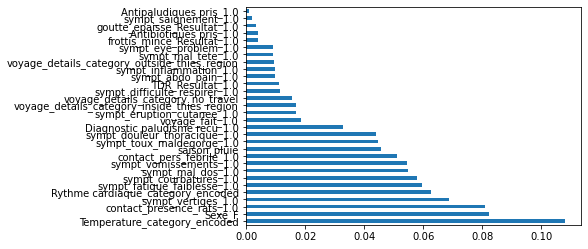

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [63]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df5.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

In [65]:
# Feature selection with SelectKBest using ANOVA (for classification tasks)
k = 10  # Select the top K features
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Filter selected features from the original DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Logistic regression modeling with cross-validation
clf = RandomForestClassifier()  # You can use any classifier of your choice
scores = cross_val_score(clf, X_selected_df, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.92380952 0.92380952 0.91428571 0.93269231 0.93269231]
Mean CV Score: 0.9254578754578754


In [66]:
X_selected_df

,Rythme cardiaque_category_encoded,Antibiotiques pris_1.0,sympt_mal_tete_1.0,sympt_vomissements_1.0,sympt_difficulte_respirer_1.0,sympt_toux_maldegorge_1.0,sympt_eye_problem_1.0,TDR_Resultat_1.0,goutte_epaisse_Resultat_1.0,frottis_mince_Resultat_1.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
518,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
519,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
520,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
521,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Feature selection with SelectKBest and logistic regression
k = 10  # Set the number of top features you want to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Filter selected features from the original DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)


In [68]:
selected_feature_names

Index(['Rythme cardiaque_category_encoded', 'Antibiotiques pris_1.0',
       'sympt_mal_tete_1.0', 'sympt_vomissements_1.0',
       'sympt_difficulte_respirer_1.0', 'sympt_toux_maldegorge_1.0',
       'sympt_eye_problem_1.0', 'TDR_Resultat_1.0',
       'goutte_epaisse_Resultat_1.0', 'frottis_mince_Resultat_1.0'],
      dtype='object')

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [70]:
df5_lasso = df5.drop(['Age', 'glycemie', 'hemoglobine', 'DensitePfalciparum_modified'], axis=1)

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df5_lasso.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

# Logistic regression with L1 regularization (LASSO) for feature selection
logreg_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
logreg_l1.fit(X, y)

# Get the selected feature names (those with non-zero coefficients after LASSO)
selected_feature_names = X.columns[logreg_l1.coef_[0] != 0]

# Filter selected features from the original DataFrame
X_selected = X[selected_feature_names]

# Perform logistic regression modeling using the selected features
clf = LogisticRegression()
scores = cross_val_score(clf, X_selected, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.92380952 0.92380952 0.92380952 0.93269231 0.93269231]
Mean CV Score: 0.9273626373626372


In [72]:
X_selected

,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,sympt_mal_tete_1.0,sympt_courbatures_1.0,sympt_vertiges_1.0,sympt_vomissements_1.0,sympt_fatigue_faiblesse_1.0,sympt_mal_dos_1.0,...,sympt_abdo_pain_1.0,sympt_eye_problem_1.0,TDR_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,0,0,1,0,1,1,1,0,1,1,...,0,0,0,0,1,1,0,0,1,0
1,0,1,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,2,0,0,1,1,1,0,1,0,...,0,0,0,1,1,1,0,0,0,0
4,0,2,1,0,1,0,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,1,0,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
519,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
520,1,2,0,0,1,0,1,0,1,1,...,0,0,0,1,1,1,0,0,0,1
521,2,2,1,0,1,0,1,1,1,0,...,0,0,0,0,1,0,1,0,0,1


**Plan 1** 
* Due to small sample size, Train all data, use optimism bootstrap to perform logistic regression for imbalanced data and evaluating model using recall, precision, f1 score, AUC-PR curve, confidence interval and odds ratio  without using train-test split
* Select best features from model using LASSO regressionTrain all data, use optimism bootstrap to perform logistic regression and re-run model on best selected features

**Plan 2** 
* Train all data, use optimism bootstrap to perform weighted logistic regression for imbalanced data and evaluating model using recall, precision, f1 score, AUC-PR curve, confidence interval and odds ratio  without using train-test split
* Select best features from model and re-run model on best selected features

**Plan 3** 
* Use SMote to handle class imbalance, Train all data, use optimism bootstrap to perform logistic regression for imbalanced data and evaluating model using recall, precision, f1 score, AUC-PR curve, confidence interval and odds ratio  without using train-test split
* Select best features from model and re-run model on best selected features


**Plan 1** - Train all data, use optimism bootstrap to perform logistic regression

In [73]:
df5

,Age,glycemie,hemoglobine,DensitePfalciparum_modified,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,1.658528,-0.054927,-1.146492e-01,0.000000,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1.0
1,-0.834627,-0.123433,-3.564391e-01,0.000000,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,-0.696118,-0.034946,2.307649e-01,0.000000,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0.0
3,-0.834627,-0.049218,1.336090e+00,0.000000,1,2,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0.0
4,-0.765373,-0.046363,-2.873563e-01,0.000000,0,2,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.273442,0.130612,-9.436431e-01,1445.786198,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0.0
519,-0.696118,-0.066344,-9.781845e-01,1445.786389,0,1,0,0,0,1,...,0,1,1,0,0,1,0,0,1,0.0
520,2.212562,-0.180522,-6.327704e-01,1445.785748,1,2,0,0,0,0,...,0,1,1,1,1,0,0,0,1,0.0
521,-0.765373,0.000000,6.135787e-16,1445.784338,2,2,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1.0


In [74]:
#Removing 'glycemie', 'DensitePfalciparum_modified', and 'hemoglobine'
df5_plan1 = df5.drop(['glycemie', 'hemoglobine', 'DensitePfalciparum_modified'], axis=1)
df5_plan1

,Age,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,sympt_mal_tete_1.0,sympt_courbatures_1.0,sympt_vertiges_1.0,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,1.658528,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,0,1,0,1.0
1,-0.834627,0,1,1,0,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0.0
2,-0.696118,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0.0
3,-0.834627,1,2,0,0,0,0,1,1,1,...,0,1,1,1,1,0,0,0,0,0.0
4,-0.765373,0,2,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.273442,0,0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0.0
519,-0.696118,0,1,0,0,0,1,1,0,1,...,0,1,1,0,0,1,0,0,1,0.0
520,2.212562,1,2,0,0,0,0,1,0,1,...,0,1,1,1,1,0,0,0,1,0.0
521,-0.765373,2,2,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,1.0


In [75]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, auc, roc_curve
import statsmodels.api as sm

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df5_plan1.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

In [83]:
X

,Age,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,sympt_mal_tete_1.0,sympt_courbatures_1.0,sympt_vertiges_1.0,...,goutte_epaisse_Resultat_1.0,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,1.658528,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,0,0,1,0
1,-0.834627,0,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,-0.696118,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,-0.834627,1,2,0,0,0,0,1,1,1,...,0,0,1,1,1,1,0,0,0,0
4,-0.765373,0,2,1,0,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.273442,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
519,-0.696118,0,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,1,0,0,1
520,2.212562,1,2,0,0,0,0,1,0,1,...,0,0,1,1,1,1,0,0,0,1
521,-0.765373,2,2,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [84]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
518    0.0
519    0.0
520    0.0
521    1.0
522    0.0
Name: Borrelia, Length: 523, dtype: float64

In [89]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Logistic regression model
logreg = LogisticRegression()

# Cross-validation and bootstrap for optimism correction
cv_predictions = cross_val_predict(logreg, X, y, cv=5, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y, cv_predictions[:, 1])

# Calculate AUC-PR curve
precision, recall, _ = precision_recall_curve(y, cv_predictions[:, 1])
auc_pr = auc(recall, precision)

# Calculate optimism-corrected AUC-PR
AUC_optimism_corrected = auc_pr - (1 - np.mean(tpr))

# Calculate mean recall, precision, F1 score
mean_recall = np.mean(recall_score(y, cv_predictions[:, 1] > 0.5))
mean_precision = np.mean(precision_score(y, cv_predictions[:, 1] > 0.5))
mean_f1_score = np.mean(f1_score(y, cv_predictions[:, 1] > 0.5))

# Confidence interval and odds ratio using statsmodels
X_constant = sm.add_constant(X)
logreg_stats = sm.Logit(y, X_constant).fit()

confidence_interval = logreg_stats.conf_int()
odds_ratio = logreg_stats.params

# Print evaluation metrics and model statistics
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Mean F1 Score:", mean_f1_score)
print("Optimism-Corrected AUC-PR:", AUC_optimism_corrected)
print("Confidence Interval:")
print(confidence_interval)
print("Odds Ratio:")
print(odds_ratio)

         Current function value: 0.202691
         Iterations: 35


LinAlgError: Singular matrix

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Load your DataFrame (replace 'df' with your DataFrame)
# Make sure to have the target variable 'y' and feature columns 'X'
# For example:
# X = df.drop('target_variable_column', axis=1)
# y = df['target_variable_column']

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5)

# Fit the Lasso model to the data
lasso.fit(X, y)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
accuracy_bootstraps = []
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_bootstraps = []

# Perform optimism bootstrap using cross-validation
for i in range(n_bootstrap):
    # Bootstrap resample the entire data with replacement
    X_boot, y_boot = resample(X_selected, y, random_state=i, replace=True)

    # Fit the weighted logistic regression model to the bootstrapped data
    weighted_logreg.fit(X_boot, y_boot)

    # Predict on the bootstrapped data using cross-validation
    y_pred_boot = cross_val_predict(weighted_logreg, X_boot, y_boot, cv=5, method='predict_proba')
    
     # Evaluate model performance on the bootstrapped data and store the results
    accuracy_bootstraps.append(accuracy_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    recall_bootstraps.append(recall_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    precision_bootstraps.append(precision_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    f1_score_bootstraps.append(f1_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    auc_bootstraps.append(roc_auc_score(y_boot, y_pred_boot[:, 1]))

# Calculate the optimism in model performance
optimism_accuracy = np.mean(accuracy_bootstraps) - accuracy_score(y, np.argmax(y_pred_boot, axis=1))
optimism_recall = np.mean(recall_bootstraps) - recall_score(y, np.argmax(y_pred_boot, axis=1))
optimism_precision = np.mean(precision_bootstraps) - precision_score(y, np.argmax(y_pred_boot, axis=1))
optimism_f1_score = np.mean(f1_score_bootstraps) - f1_score(y, np.argmax(y_pred_boot, axis=1))
optimism_auc = np.mean(auc_bootstraps) - roc_auc_score(y, y_pred_boot[:, 1])

# Print optimism in model performance
print("Optimism in Accuracy:", optimism_accuracy)
print("Optimism in Recall:", optimism_recall)
print("Optimism in Precision:", optimism_precision)
print("Optimism in F1 Score:", optimism_f1_score)
print("Optimism in AUC:", optimism_auc)


Optimism in Accuracy: 0.022751434034416818
Optimism in Recall: 0.2059057958671197
Optimism in Precision: 0.0464742512118302
Optimism in F1 Score: 0.07457546641481497
Optimism in AUC: 0.17530068782166308


In [91]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


In [92]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5)

# Fit the Lasso model to the data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
accuracy_bootstraps = []
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_bootstraps = []

# Perform optimism bootstrap using cross-validation
for i in range(n_bootstrap):
    # Bootstrap resample the entire data with replacement
    X_boot, y_boot = resample(X_selected, y_resampled, random_state=i, replace=True)

    # Fit the weighted logistic regression model to the bootstrapped data
    weighted_logreg.fit(X_boot, y_boot)

    # Predict on the bootstrapped data using cross-validation
    y_pred_boot = cross_val_predict(weighted_logreg, X_boot, y_boot, cv=5, method='predict_proba')

    # Evaluate model performance on the bootstrapped data and store the results
    accuracy_bootstraps.append(accuracy_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    recall_bootstraps.append(recall_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    precision_bootstraps.append(precision_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    f1_score_bootstraps.append(f1_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    auc_bootstraps.append(roc_auc_score(y_boot, y_pred_boot[:, 1]))

# Calculate the optimism in model performance
optimism_accuracy = np.mean(accuracy_bootstraps) - accuracy_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_recall = np.mean(recall_bootstraps) - recall_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_precision = np.mean(precision_bootstraps) - precision_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_f1_score = np.mean(f1_score_bootstraps) - f1_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_auc = np.mean(auc_bootstraps) - roc_auc_score(y_resampled, y_pred_boot[:, 1])

# Print optimism in model performance
print("Optimism in Accuracy:", optimism_accuracy)
print("Optimism in Recall:", optimism_recall)
print("Optimism in Precision:", optimism_precision)
print("Optimism in F1 Score:", optimism_f1_score)
print("Optimism in AUC:", optimism_auc)    


Optimism in Accuracy: 0.3807288659793817
Optimism in Recall: 0.3864202182794495
Optimism in Precision: 0.35282923096779983
Optimism in F1 Score: 0.36882198662277166
Optimism in AUC: 0.4489747838901607


In [93]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem


# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

# Perform optimism bootstrap using KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_selected, y_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
       # Fit the weighted logistic regression model to the training data
    weighted_logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = weighted_logreg.predict(X_test)

    # Calculate recall, precision, and F1 score for the test set
    recall_bootstraps.append(recall_score(y_test, y_pred_test))
    precision_bootstraps.append(precision_score(y_test, y_pred_test))
    f1_score_bootstraps.append(f1_score(y_test, y_pred_test))

    # Calculate AUC-ROC curve for the test set
    y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
    auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))

    # Calculate AUC-PR curve for the test set
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
    auc_pr_bootstraps.append(auc(recall_curve, precision_curve))

    # Calculate odds ratio
    odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

Recall: 0.922 [0.909 - 0.944]
Precision: 0.847 [0.806 - 0.893]
F1 Score: 0.883 [0.857 - 0.902]
AUC-ROC: 0.931 [0.921 - 0.947]
AUC-PR: 0.919 [0.889 - 0.956]
Odds Ratio: 0.818 [0.795 - 0.841]


Accuracy: 0.877 [0.854 - 0.897]


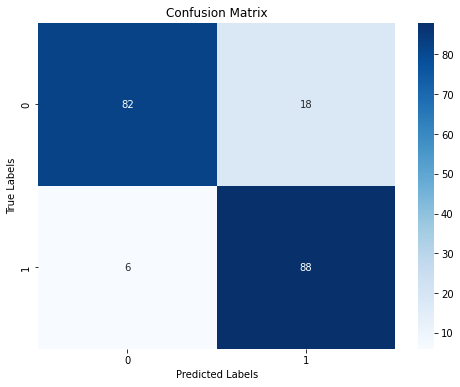

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
accuracy_ci = np.percentile(accuracy_bootstraps, [2.5, 97.5])
print("Accuracy: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(accuracy_bootstraps), accuracy_ci[0], accuracy_ci[1]))

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted probabilities (y_pred_prob_test)
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_test = np.where(y_pred_prob_test >= 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


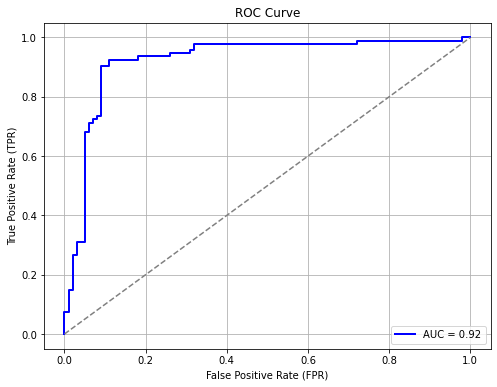

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

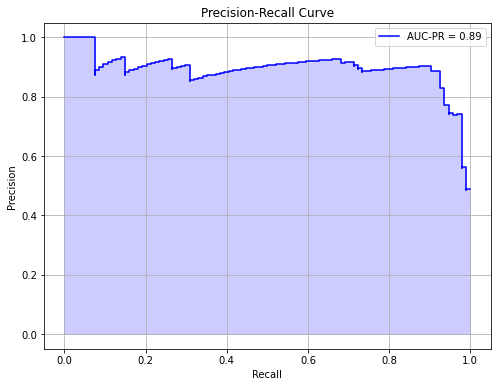

In [96]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_test)

# Plot the AUC-PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'AUC-PR = {avg_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [97]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Print the feature importances
print("Feature Importances:")
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance:.3f}")

Feature Importances:
voyage_details_category_no_travel: 2.821
sympt_toux_maldegorge_1.0: 2.783
TDR_Resultat_1.0: 2.356
sympt_mal_tete_1.0: 2.033
Antibiotiques pris_1.0: 1.768
voyage_fait_1.0: 1.736
sympt_douleur_thoracique_1.0: 1.621
sympt_difficulte_respirer_1.0: 1.567
sympt_inflammation_1.0: 1.442
saison_pluie: 1.329
sympt_vomissements_1.0: 1.170
Sexe_F: 1.017
Diagnostic paludisme recu_1.0: 0.977
sympt_abdo_pain_1.0: 0.932
goutte_epaisse_Resultat_1.0: 0.902
sympt_fatigue_faiblesse_1.0: 0.847
voyage_details_category_outside_senegal: 0.832
contact_presence_rats_1.0: 0.791
Rythme cardiaque_category_encoded: 0.468
voyage_details_category_outside_thies_region: 0.402
Age: 0.197
sympt_mal_dos_1.0: 0.098
sympt_courbatures_1.0: 0.080
sympt_vertiges_1.0: 0.059
contact_pers_febrile_1.0: 0.032


In [98]:
#import matplotlib.pyplot as plt

# Get the absolute values of the coefficients and sort them in descending order
#feature_importance_scores = np.abs(weighted_logreg.coef_[0])
#sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
#features, importances = zip(*sorted_feature_importances)

# Create a bar plot
#plt.figure(figsize=(10, 6))
#plt.bar(range(len(features)), importances)
#plt.xticks(range(len(features)), features, rotation=45, ha='right')
#plt.xlabel('Features')
#plt.ylabel('Importance Score')
#plt.title('Feature Importances')
#plt.tight_layout()
#plt.show()

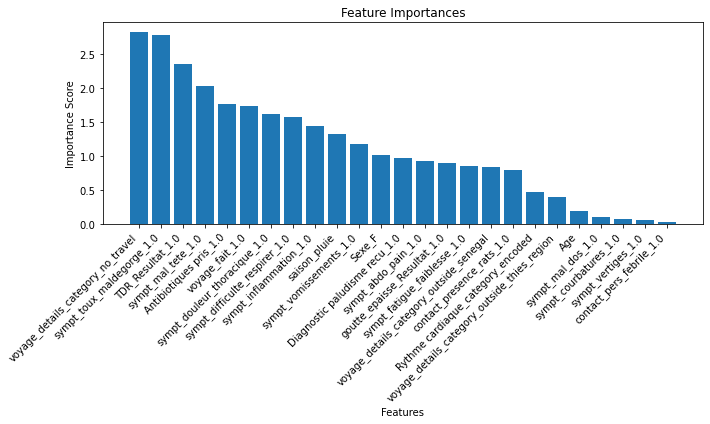

In [99]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importances)

# Create a bar plot with numerical values for bar heights
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), [score for score, _ in sorted_feature_importances])  # Use list comprehension for bar heights
plt.xticks(range(len(features)), [name for _, name in sorted_feature_importances], rotation=45, ha='right')  # Set xticks with feature names
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
